In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['font.size'] = 15.0

import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import brown
import re
import os
import codecs
from sklearn import feature_extraction

In [ ]:
hack = pd.read_csv('/content/b_database.csv',encoding = "ISO-8859-1")

In [ ]:
hack = pd.read_csv('/content/finall.csv',encoding = "ISO-8859-1")

In [ ]:
hack.shape

(1969, 10)

In [ ]:
hack

,Unnamed: 0,Attack Type,Attack_class,Author,Country,Description,Organization Name,Sector,Year,Date
0,0,Unknown,Cyber Crime,Unknown,CA,A server hack at Algonquin College in Ottawa l...,Algonquin College,Education,2021,12-06-2015
1,1,Unknown,Cyber Crime,Unknown,IN,The salary accounts of more than 23 employees ...,Infosys Ltd,Industry: Software,2021,17-06-2015
2,2,Malware,Cyber Crime,Unknown,JP,The internal computer network of the state-run...,Japan Environmental Storage & Safety Corp.,Industry: waste treatment,2021,15-06-2015
3,3,Targeted Attack,Cyber Espionage,Unknown,RU,Researchers from Palo Alto Networks reveal the...,Confidential Organization,"GovernmentÃÂÃÂÃÂ¬,\rMilitary",2021,16-06-2015
4,4,Unknown,Cyber Crime,St. Louis Cardinals,US,The St. Louis Cardinals baseball franchise is ...,Houston Astros,Single Individual,2021,16-06-2015
...,...,...,...,...,...,...,...,...,...,...
1964,1964,Malware,Cyber Crime,Unknown,KR,"A South Korean Web-hosting service provider, N...",Nayana,Industry: Telco,2023,14-06-2017
1965,1965,Malware,Cyber Crime,Unknown,UK,University College London is hit by a ÃÂÃÂ...,University College London,Education,2023,15-06-2017
1966,1966,Malware,Cyber Crime,Unknown,UK,The Ulster University is also hit by Ransomware.,Ulster University,Education,2023,15-06-2017
1967,1967,DDoS,Cyber Crime,Unknown,HK,"Bitfinex, the worldÃÂÃÂÃÂªs largest US do...",Bitfinex,Cryptocurrency Exchange,2023,15-06-2017


In [ ]:
hack = hack.drop(hack.columns[0], axis=1)

In [ ]:
hack

,Attack Type,Attack_class,Author,Country,Description,Organization Name,Sector,Year,Date
0,Unknown,Cyber Crime,Unknown,CA,A server hack at Algonquin College in Ottawa l...,Algonquin College,Education,2021,12-06-2015
1,Unknown,Cyber Crime,Unknown,IN,The salary accounts of more than 23 employees ...,Infosys Ltd,Industry: Software,2021,17-06-2015
2,Malware,Cyber Crime,Unknown,JP,The internal computer network of the state-run...,Japan Environmental Storage & Safety Corp.,Industry: waste treatment,2021,15-06-2015
3,Targeted Attack,Cyber Espionage,Unknown,RU,Researchers from Palo Alto Networks reveal the...,Confidential Organization,"GovernmentÃÂÃÂÃÂ¬,\rMilitary",2021,16-06-2015
4,Unknown,Cyber Crime,St. Louis Cardinals,US,The St. Louis Cardinals baseball franchise is ...,Houston Astros,Single Individual,2021,16-06-2015
...,...,...,...,...,...,...,...,...,...
1964,Malware,Cyber Crime,Unknown,KR,"A South Korean Web-hosting service provider, N...",Nayana,Industry: Telco,2023,14-06-2017
1965,Malware,Cyber Crime,Unknown,UK,University College London is hit by a ÃÂÃÂ...,University College London,Education,2023,15-06-2017
1966,Malware,Cyber Crime,Unknown,UK,The Ulster University is also hit by Ransomware.,Ulster University,Education,2023,15-06-2017
1967,DDoS,Cyber Crime,Unknown,HK,"Bitfinex, the worldÃÂÃÂÃÂªs largest US do...",Bitfinex,Cryptocurrency Exchange,2023,15-06-2017


In [ ]:
hack['Sector'].value_counts()

Government                     288
Single Individuals             135
Education                      123
Private                        109
Finance                         74
                              ... 
Industry: Job Search             1
Social Club                      1
Bus Station                      1
Virtual Community                1
Industry: Internet Families      1
Name: Sector, Length: 366, dtype: int64

In [ ]:
hack.iloc[94]

Attack Type                                                    Unknown
Attack_class                                                Hacktivism
Author                                                       Anonymous
Country                                                             CA
Description          Hackers from the Anonymous collective say they...
Organization Name                                               Canada
Sector                                                      Government
Year                                                              2021
Date                                                        25-07-2015
Name: 95, dtype: object

In [ ]:
hack=hack.drop(hack.index[94],axis=0)

In [ ]:
hack['Attack Type'].nunique()

128

In [ ]:
hack['Attack_class'].value_counts()

Cyber Crime        1404
Hacktivism          259
Cyber Espionage     232
Cyber War            74
Name: Attack_class, dtype: int64

In [ ]:
(hack['Country']=='RU').sum()

232

In [ ]:
hack['Country'] = hack['Country'].replace(['>1'],['RU'])
hack['Country'] = hack['Country'].replace(['UA,\r'],['US'])

In [ ]:
hack['Country'].value_counts()

US                         795
RU                         232
UK                         107
IN                          64
CA                          49
                          ... 
AO                           1
DO GG MV NL PA KE MX BA      1
JO KR FR ME                  1
FJ                           1
UA  AU                       1
Name: Country, Length: 132, dtype: int64

In [ ]:
hack['Author']= hack['Author'].str.replace('?','Unknown')

<ipython-input-25-fdfcfaf1033a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hack['Author']= hack['Author'].str.replace('?','Unknown')


In [ ]:
hack.columns = hack.columns.str.replace('dat','Date')

In [ ]:
hack['Attack_class'] = hack['Attack_class'].replace(['H','CC','CE','CW','CC,CE'],['Hacktivism', 'Cyber Crime','Cyber Espionage','Cyber War','Cyber Crime'])

In [ ]:
hack.iloc[104]

Attack Type                                            Targeted Attack
Attack_class                                           Cyber Espionage
Author                                                           APT29
Country                                                             RU
Description          Researchers at FireEye unveil a stealthy malwa...
Organization Name                            Confidential Organization
Sector                                                      Government
Year                                                              2021
Date                                                        30-07-2015
Name: 105, dtype: object

In [ ]:
hack['Organization Name'].value_counts()

Confidential Organization                                         23
South Korean Company                                               9
Single Individuals                                                 7
US Democratic Party                                                6
Android Users                                                      6
                                                                  ..
Centre dÃÂÃÂÃÂªIdentification des Materiels de la Defense     1
Websites of Italian Regions Apulia and Basilicata                  1
York Hospital                                                      1
Linux Mint Distribution                                            1
Multiple Industrial Firms                                          1
Name: Organization Name, Length: 1820, dtype: int64

In [ ]:
hack['Attack_class'] = hack['Attack_class'].replace(['2015','CCCE','Industry: Telco','IN','JP','US'],['Cyber Espionage','Cyber Espionage','Cyber Espionage','Cyber Espionage','Cyber Espionage','Cyber Espionage'])

In [ ]:
hack['Attack Type']=[i.replace('?','') for i in hack['Attack Type']]
hack['Attack Type']=[i.replace(',\r','') for i in hack['Attack Type']]
hack['Attack_class']=[i.replace(',\r','') for i in hack['Attack_class']]

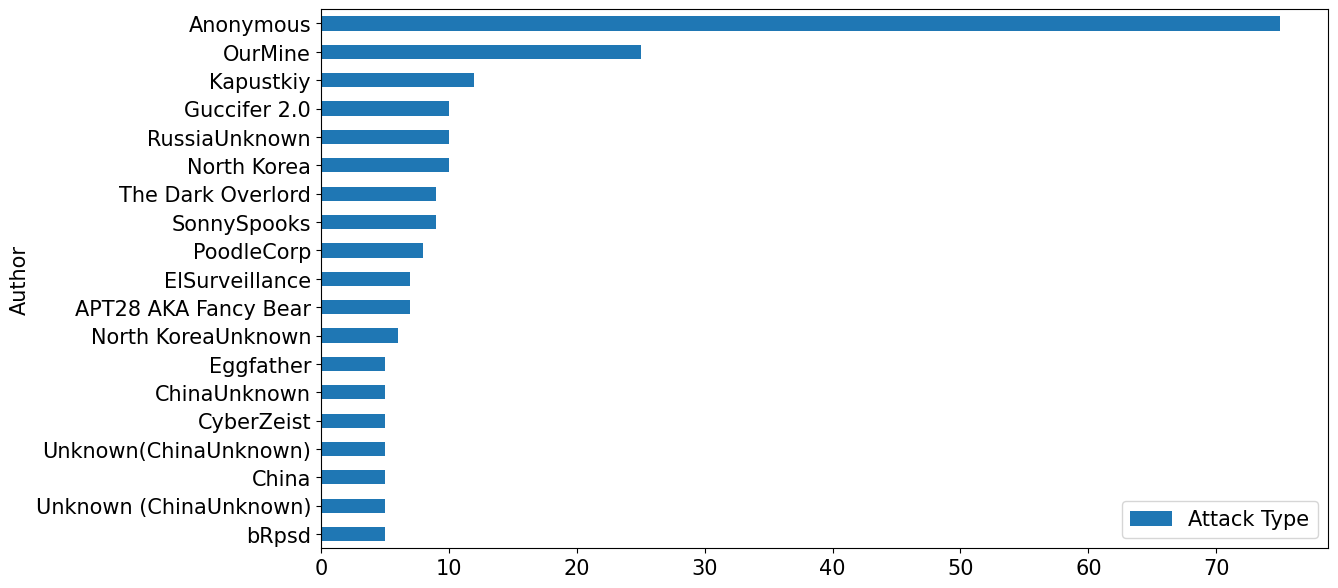

In [ ]:
hack.groupby('Author').agg({'Attack Type':'count'}).sort_values('Attack Type', ascending = True).tail(20)[:-1].plot.barh(grid = False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("hacker.png",bbox_inches='tight')

In [ ]:
(hack['Organization Name']==',,,,').sum()

0

In [ ]:
hack['Organization Name'] = hack['Organization Name'].replace(['South Korea'],['South Korean Company'])
hack['Organization Name'] = hack['Organization Name'].replace(['>1,\r'],['Confidential Organization'])

In [ ]:
hack['Sector'] = hack['Sector'].replace(['>1'],['Private'])

<ipython-input-11-c402c3689f7f>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  test = g.pivot("Attack","Attack_class","Target").fillna(0)
) missing from current font.
  fig.canvas.draw()
) missing from current font.
  func(*args, **kwargs)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


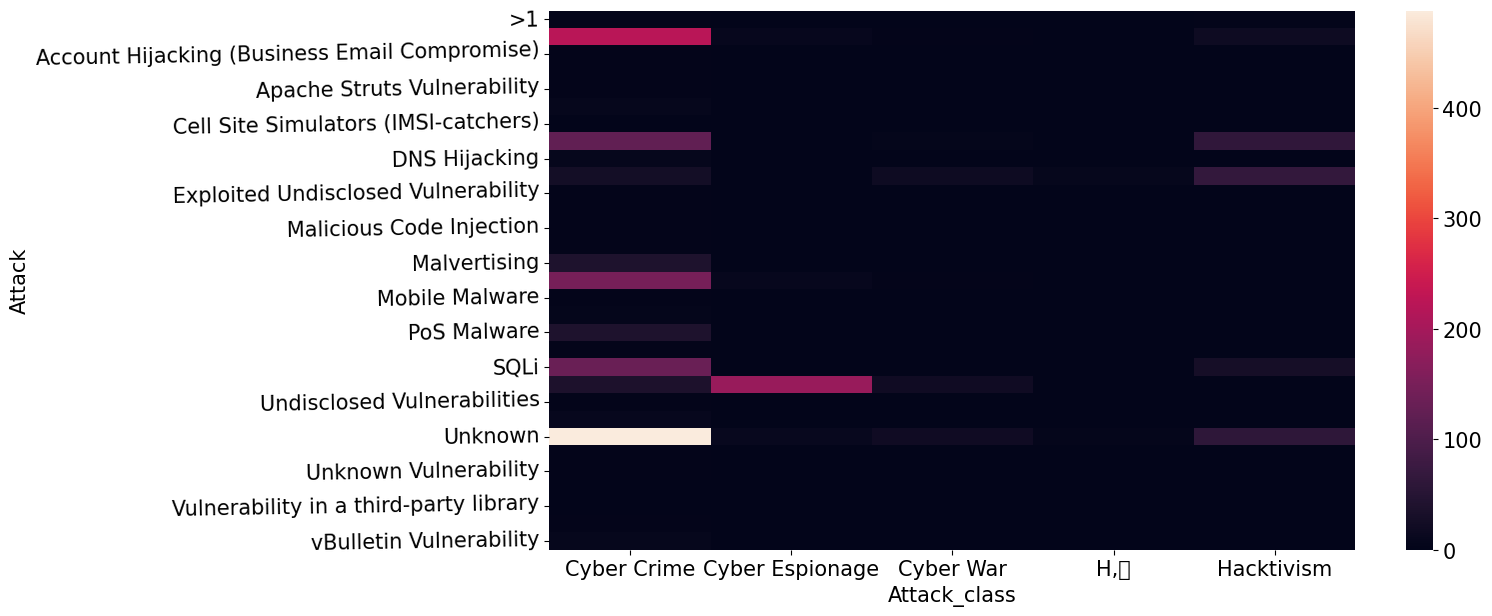

In [ ]:
g = hack.groupby(['Attack_class','Attack']).agg({'Target':'count'}).reset_index().sort_values('Target',ascending = False).head(50)
#sns.heatmap(g)
#
test = g.pivot("Attack","Attack_class","Target").fillna(0)

sns.heatmap(test)
plt.yticks(rotation=1)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("heatmap.png",bbox_inches='tight')


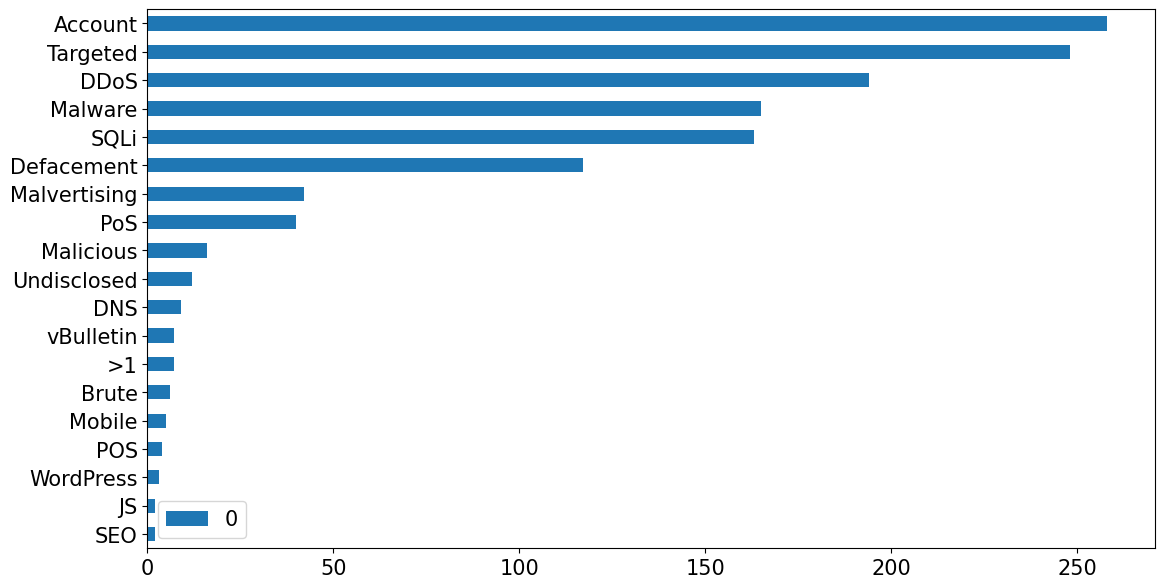

In [ ]:
b = [i.split(' ')[0] for i in hack['Attack Type'].tolist() if type(i) != float]
b = [i.split(',')[0] for i in b if type(i) != float]
b = [i.split(',\r')[0] for i in b if type(i) != float]
b = [str(i).replace('?','') for i in b]

#b.groupby('Attack').agg({'Author':'count'}).reset_index().sort_values('Author', ascending = False)
pd.DataFrame.from_dict(dict(Counter(b)),orient='index').sort_values(0,ascending=True).tail(20)[:-1].plot.barh(grid=False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("top_attack_bar.png",bbox_inches='tight')

In [ ]:
hack.groupby(['Author','Attack']).agg({'Target':'count'}).sort_values('Target',ascending = False)
#sns.heatmap(q)

Target
Author                                           Attack                   
Unknown                                          Unknown               385
                                                 Account Hijacking     172
                                                 Malware               138
                                                 DDoS                   94
                                                 Targeted Attack        87
...                                                                    ...
18/07/15                                         Law Enforcement         0
17/07/15                                         Government              0
Blacksmith HackerÂÃÂªs Team                    Defacement              0
Phineas Phisher AKA Hack Back! AKA @GammaGroupPR Unknown                 0
FruityArmor                                      Targeted Attack         0

[697 rows x 1 columns]

In [ ]:
hack.to_csv('finall.csv')

In [ ]:
df=df.drop(['Date'],axis=1)

In [ ]:
df

,Unnamed: 0,Attack Type,Attack_class,Author,Country,Description,Organization Name,Sector,Year
0,0,109,0,470,19,A server hack at Algonquin College in Ottawa l...,100,36,2021
1,1,109,0,470,52,The salary accounts of more than 23 employees ...,599,213,2021
2,2,68,0,470,60,The internal computer network of the state-run...,637,241,2021
3,3,102,1,470,94,Researchers from Palo Alto Networks reveal the...,327,51,2021
4,4,109,0,413,116,The St. Louis Cardinals baseball franchise is ...,566,339,2021
...,...,...,...,...,...,...,...,...,...
1963,1964,68,0,470,65,"A South Korean Web-hosting service provider, N...",859,224,2023
1964,1965,68,0,470,114,University College London is hit by a ÃÂÃÂ...,1452,36,2023
1965,1966,68,0,470,114,The Ulster University is also hit by Ransomware.,1437,36,2023
1966,1967,25,0,470,47,"Bitfinex, the worldÃÂÃÂÃÂªs largest US do...",207,27,2023


In [ ]:
df.isnull().sum()

Unnamed: 0           0
Attack Type          0
Attack_class         0
Author               0
Country              0
Description          2
Organization Name    0
Sector               0
Year                 0
dtype: int64

In [ ]:
# Fill NaN values in 'Description' column with a placeholder string
df['Description'] = df['Description'].fillna('No description available')

In [ ]:
hack = hack.replace(['cloudbleed'],['2017'])

In [ ]:
hack['Country'] = hack['Country'].replace(['Cyber'],['US'])

In [ ]:
hack.groupby('Author').agg(['count'])['Attack'].sort_values('count', ascending=False)

,count
Author,
Unknown,1110
Anonymous,75
OurMine,25
Kapustkiy,12
RussiaUnknown,10
...,...
Expl.oit AKA Exploit,1
Exfocus,1
Exe-code,1


In [ ]:
descr = hack['Description'].tolist()
tf = [True if (re.findall('million|billion',i) != []) else False for i in descr]

In [ ]:
n = [str(i).replace('Industry: ','') for i in hack['Target_class']]
n = [str(i).replace('Org: ','') for i in n]

In [ ]:
hack['Attack_class']=[str(i).replace(',\r','') for i in hack['Attack_class']]

In [ ]:
hack['Attack_class']=hack['Attack_class'].replace(['CC','CCCE','CW?','H','IN','Industry: Telco','JP','US'],['Cyber Crime','Cyber Espionage','Cyber War','Hacktivism','Cyber Crime','Cyber War','Hacktivism','Cyber Espionage'])

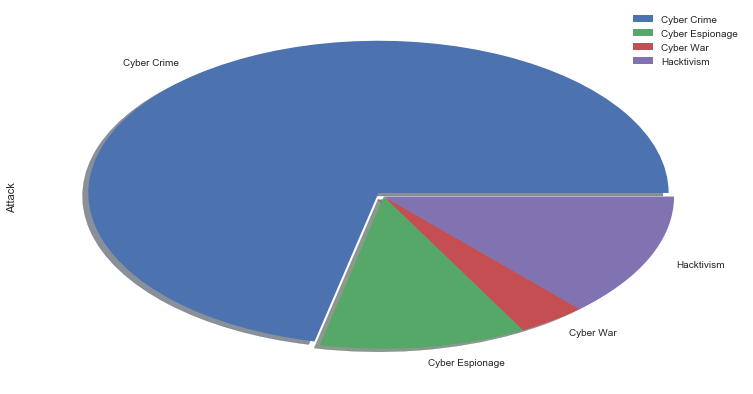

In [ ]:

hack.groupby('Attack_class').agg({'Attack': 'count'}).plot.pie(subplots=True, explode=(0.03,0,0,0), shadow=True)
plt.tick_params(labelsize='25')
#plt.savefig("attack_class_pie.png",bbox_inches='tight')

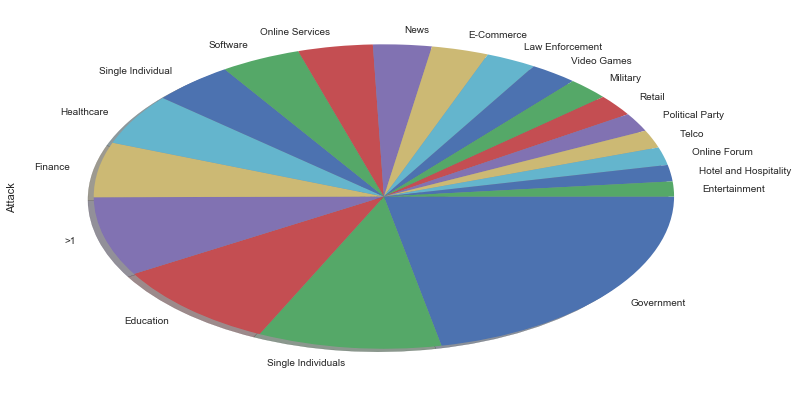

In [ ]:
hack.groupby('Target_class').agg({'Attack': 'count'}).sort_values('Attack', ascending = False) \
.head(20).plot.pie(subplots=True,shadow=True, counterclock = False,legend=None)
#mpl.rcParams['font.size'] = 20.0
#plt.tick_params(axis='both', which='major', labelsize=15)
#plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("target_class.png",bbox_inches='tight')

In [ ]:
#[pd.to_datetime(i,format='%d/%m/%y') for i in hack['Date']]

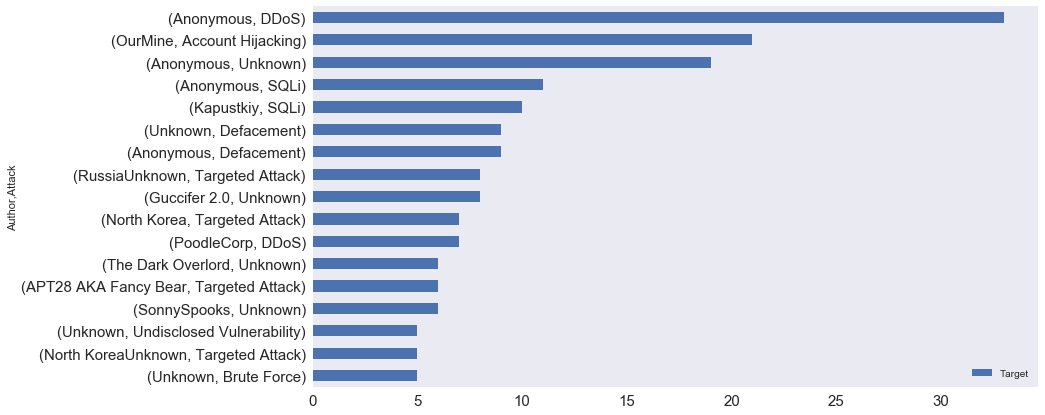

In [ ]:
hack.groupby(['Author','Attack']).agg({'Target':'count'}) \
.sort_values('Target',ascending = True).tail(25)[:-8].plot.barh(grid = False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.savefig("author&attack_bar.png",bbox_inches='tight')

In [ ]:
pd.set_option('display.max_rows', 300)

In [ ]:
hack.groupby(['Author','Target_class','Country']).\
    agg({'Target':'count'}).reset_index().sort_values('Target',ascending = False)

In [ ]:
hack[hack['Author']=='Guccifer 2.0']['Description'].tolist()

In [ ]:
authors = hack['Author'].tolist()

In [ ]:
target = hack['Target'].tolist()

In [ ]:
clas = hack['Target_class'].tolist()

In [ ]:
country = hack['Country'].tolist()


In [ ]:
a = [i.split(' ')[0] for i in country if type(i) != float]
a = [i.split(',')[0] for i in a if type(i) != float]
a = [i.split(',\r')[0] for i in a if type(i) != float]


In [ ]:
print(Counter(a))

Counter({'US': 829, '>1': 197, 'UK': 114, 'IN': 64, 'CA': 49, 'RU': 39, 'AU': 35, 'JP': 33, 'KR': 25, 'DE': 24, 'IL': 22, 'IT': 21, 'CN': 21, 'FR': 21, 'GB': 21, 'UA': 19, 'TH': 18, 'BR': 16, 'SE': 14, 'ZA': 14, 'TR': 14, 'PK': 13, 'NL': 12, 'TW': 11, 'SA': 11, 'IE': 11, 'IR': 10, 'AZ': 9, 'HK': 9, 'CH': 8, 'PL': 7, 'VE': 7, 'PH': 7, 'INT': 7, 'BE': 6, 'MX': 6, 'NZ': 6, 'NO': 6, 'KE': 6, 'SG': 6, 'UAE': 5, 'BD': 5, 'DK': 5, 'AT': 5, 'CZ': 5, 'EU': 5, 'SY': 4, 'CY': 4, 'AM': 4, 'QA': 4, 'JO': 3, 'RO': 3, 'LK': 3, 'EC': 3, 'EG': 3, 'ES': 3, 'FI': 3, 'AE': 3, 'AF': 3, 'CC': 3, 'LU': 3, 'KY': 2, 'ID': 2, 'VN': 2, 'LB': 2, 'GR': 2, 'CR': 2, 'UG': 2, 'NG': 2, 'SK': 2, 'PA': 2, 'AL': 2, 'AR': 2, 'KW': 2, 'LT': 2, 'ME': 2, 'VU': 1, 'GE': 1, 'MY': 1, 'YU': 1, 'MA': 1, '>`1': 1, 'IQ': 1, 'IS': 1, 'BB': 1, 'OM': 1, '.TI': 1, 'KH': 1, 'CO': 1, 'RW': 1, 'H': 1, 'CL': 1, 'BO': 1, 'TZ': 1, 'GU': 1, 'AO': 1, 'DO': 1, 'FJ': 1, 'MM': 1, 'ZW': 1, 'KZ': 1, 'PY': 1, '>A': 1, 'LY': 1, 'HU': 1, 'BS': 1, 'SCO

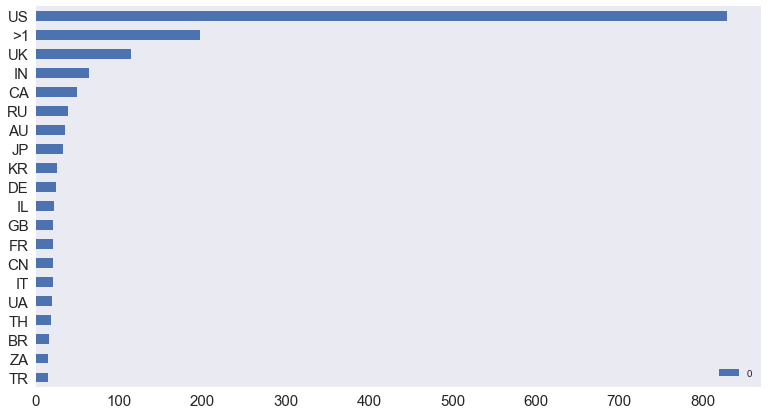

In [ ]:
pd.DataFrame.from_dict(dict(Counter(a)),orient='index').sort_values(0,ascending=True).tail(20).plot.barh(grid=False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("country_bar.png",bbox_inches='tight')


In [ ]:
description = hack['Description'].tolist()

In [ ]:
target[:10]

['Algonquin College',
 'Infosys Ltd',
 'Japan Environmental Storage & Safety Corp.',
 '>1',
 'Houston Astros',
 'Bonnier Publications',
 'EFnet',
 'University of Baltimore affiliated website (bniajfi.org)',
 'Canadian Governments Web Sites',
 'digitalcostitution.com']

In [ ]:
word = nltk.corpus.cmudict.words()

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/0xiNach/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize,sent_tokenize
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in description:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list

    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [ ]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 50580 items in vocab_frame


In [ ]:
print (vocab_frame.head())

               words
a                  a
server        server
hack            hack
at                at
algonquin  algonquin


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=200000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(description) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 2.39 s, sys: 21.5 ms, total: 2.41 s
Wall time: 2.42 s
(1966, 45)


In [ ]:
terms = tfidf_vectorizer.get_feature_names()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity (tfidf_matrix)

In [ ]:
tfidf_matrix

<1966x45 sparse matrix of type '<class 'numpy.float64'>'
	with 7289 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 12

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 1.42 s, sys: 7.78 ms, total: 1.42 s
Wall time: 1.43 s


In [ ]:
from sklearn.externals import joblib

#uncomment the below to save your model
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()


In [ ]:
at = { 'target': target, 'author': authors, 'description': description, 'cluster': clusters,'class':clas }

clu = pd.DataFrame(at, index = [clusters] , columns = ['target', 'author', 'cluster','description','class'])

In [ ]:
clu['cluster'].value_counts()

11    383
7     223
1     185
5     176
0     145
10    143
8     142
3     121
4     119
9     116
6     112
2     101
Name: cluster, dtype: int64

In [ ]:
#### from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')

    for ind in order_centroids[i, :4]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

#     print("Cluster %d titles:" % i, end='')
#     for title in clu.loc[i]['target'].values.tolist():
#         print(' %s,' % title, end='')
#     print() #add whitespace
#     print() #add whitespace

print()
print()

Top terms per cluster:

Cluster 0 words: b'dumps', b'passwords', b'usernames', b'records',

Cluster 1 words: b'accounts', b'million', b'email', b'users',

Cluster 2 words: b'malware', b'reveal', b'used', b'researchers',

Cluster 3 words: b'website', b'anonymous', b'government', b'claims',

Cluster 4 words: b'campaign', b'target', b'reveal', b'new',

Cluster 5 words: b'breach', b'data', b'customers', b'security',

Cluster 6 words: b'defaced', b'website', b'officials', b'group',

Cluster 7 words: b'reveal', b'target', b'attacks', b'group',

Cluster 8 words: b'information', b'personal', b'access', b'compromised',

Cluster 9 words: b'ddos', b'attacks', b'ddos', b'website',

Cluster 10 words: b'data', b'leaked', b'customers', b'compromised',

Cluster 11 words: b'leaked', b'claims', b'database', b'anonymous',





In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()


In [ ]:
cluster_colors = {0: '#3db5aa', 1: '#d15545', 2: '#781835', 3: '#ffa21f', 4: '#86b313', 5: '#ff00c1', 6: '#686765', 7: '#9270ff', 8: '#560c64', 9: '#887136', 10:'#67beff', 11: '#f94848'}

#set up cluster names using a dict
cluster_names = {0: 'dumps, passwords, usernames, records : 145',

                 1: 'accounts, million, email, users : 185',

                 2: 'malware, reveal, used, researchers : 101',

                 3: 'website, anonymous, government, claims : 121',

                 4: 'campaign, target, reveal, new : 119',

                 5: 'breach, data, customers, security : 176',

                 6: 'defaced, website, officials, group : 112',

                 7: 'reveal, target, attacks, group : 221',

                 8: 'information, personal, access, compromised : 142',

                 9: 'ddos, attacks, website : 116',

                 10: 'data, leaked, customers, compromised : 143',

                 11: 'leaked, claims, database, anonymous : 383'}


In [ ]:
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [ ]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=target))

#group by cluster
groups = df.groupby('label')
number = groups.agg({'title':'count'})

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot
fig, ax = plt.subplots(figsize=(24,12)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot (group.x, group.y, marker='o', linestyle='', ms=10,
                     label=cluster_names[name], mec='none',
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]

    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=20, hoffset=20, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())

    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)


ax.legend(numpoints=1,fontsize = 15) #show legend with only one dot


mpld3.display() #show the plot

#uncomment the below to export to html
html = mpld3.fig_to_html(fig)
Html_file= open("cluster2.html","w")
Html_file.write(html)
Html_file.close()

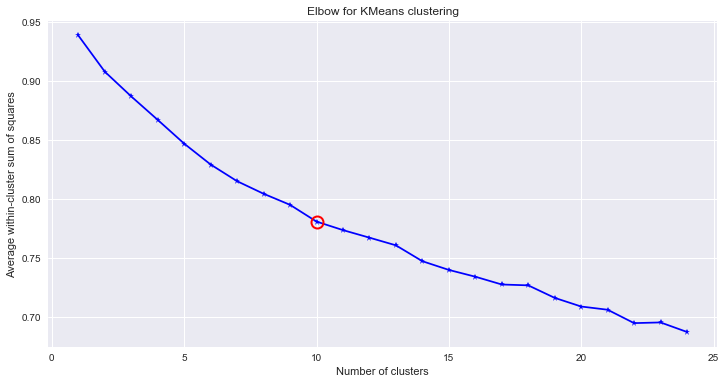

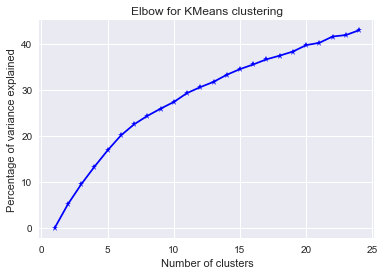

In [ ]:
K = range(1,25)

KM = [KMeans(n_clusters=k).fit(tfidf_matrix) for k in K]


from scipy.spatial.distance import cdist, pdist

centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(tfidf_matrix.toarray(), cent,'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/tfidf_matrix.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(tfidf_matrix.toarray())**2)/tfidf_matrix.shape[0]
bss = tss-wcss

kIdx = 10-1

# elbow curve
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')


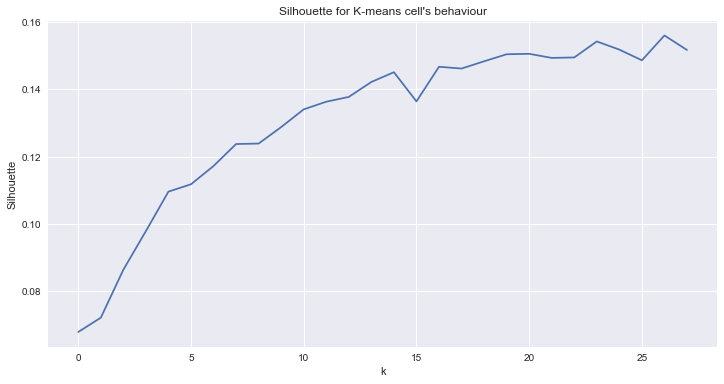

In [ ]:
from sklearn.metrics import silhouette_score

s = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(tfidf_matrix)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(tfidf_matrix, labels))

plt.figure(figsize=(12,6))
plt.plot(s)
plt.ylabel("Silhouette")
plt.xlabel("k")
plt.title("Silhouette for K-means cell's behaviour")
sns.despine()

In [ ]:
groups.agg({'title':'count'}).sort_values('title',ascending=False)

,title
label,
11,383
7,221
1,185
5,176
0,145
10,143
8,142
3,121
4,119
